In [9]:
import numpy as  np

all_uvs = np.load("/local/home/aarslan/score-face/assets/uv.npy")
all_file_ids = np.load("/local/home/aarslan/score-face/assets/filename.npy", allow_pickle=True)


(512, 512, 2)


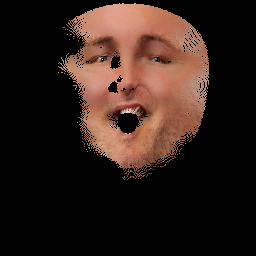

(512, 512, 2)


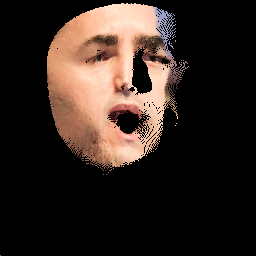

(512, 512, 2)


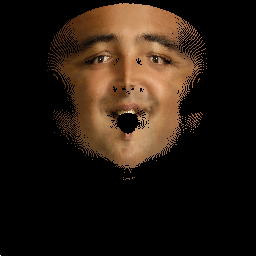

(512, 512, 2)


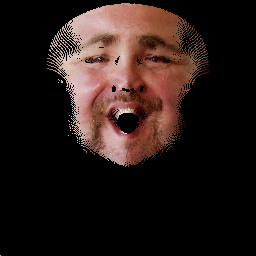

In [27]:
import os
import cv2
from PIL import Image

texture_size = 256

input_folder_path = "../assets/FFHQ"
output_folder_path = "../assets/FFHQ_VariTex_results"
chosen_file_paths = [os.path.join(input_folder_path, chosen_file_name) for chosen_file_name in os.listdir(input_folder_path)]
chosen_file_ids = [chosen_file_name.split(".")[0] for chosen_file_name in os.listdir(input_folder_path)]
chosen_file_indices = [np.where(all_file_ids == chosen_file_id) for chosen_file_id in chosen_file_ids]

for chosen_file_index, chosen_file_path in zip(chosen_file_indices, chosen_file_paths):
    chosen_uv = all_uvs[chosen_file_index][0]
    chosen_image = cv2.resize(cv2.imread(chosen_file_path)[:, :, [2, 1, 0]], dsize=(512, 512))
    chosen_texture = np.zeros((texture_size, texture_size, 3))
    for y in range(chosen_image.shape[0]):
        for x in range(chosen_image.shape[1]):
            u = int( (chosen_uv[y, x, 0] + 1) / 2 * texture_size)
            v = texture_size - 1 - int( (chosen_uv[y, x, 1] + 1) / 2 * texture_size)
            chosen_texture[v, u] = chosen_image[y, x]
    
    chosen_texture = chosen_texture.astype(np.uint8)
    chosen_texture = chosen_texture[:, :, [2, 1, 0]]
    os.makedirs(output_folder_path, exists_ok=True)
    cv2.imwrite(chosen_texture, os.path.join())



    # display(Image.fromarray(chosen_texture))

    # print(chosen_uv.shape)
    # print(chosen_uv.min(), chosen_uv.max())
    # raise Exception("asd")





[array([], shape=(1, 0), dtype=int64),
 array([], shape=(1, 0), dtype=int64),
 array([], shape=(1, 0), dtype=int64),
 array([], shape=(1, 0), dtype=int64)]